## k-Means for Image Compression

The goal of this exercise is to use k-means clustering for image compression in Python.

Loading an image of the famous painting "American Gothic" by Grand Wood, and store it as an RGB-image. 

In [25]:

import numpy as np
from skimage import io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [26]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Grant_Wood_-_American_Gothic_-_Google_Art_Project.jpg/895px-Grant_Wood_-_American_Gothic_-_Google_Art_Project.jpg"


img = io.imread(url)

io.imsave('a.jpg',img)
img.shape

(1080, 895, 3)

In [27]:

r =  img[ : , : , 0 ]
g = img[ : , : , 1 ]
b = img[ : , : , 2 ]



Determining how many unique colors the painting contains.

In [28]:

unique_colors= np.unique (img,axis=0).size

print("Unique colors:", unique_colors)

Unique colors: 2899800


Applying k-means clustering to compress the image. 

In [29]:


def compress_image(image, number_of_clusters, keep_kmeans_objects=False):
  
  h = image/255.
  h= h.reshape((1080*895,3))

  km = KMeans(number_of_clusters)
  km = km.fit(h)
  c= km.predict(h)
  c= (km.cluster_centers_[c])
 
  c= c.clip(min=0.,max=1.)
  l= c.reshape((1080,895,3))

  compressed_image = (l*255).astype(image.dtype)

  returns = None
  if keep_kmeans_objects:
    returns = compressed_image, km
  else:
    returns = compressed_image
  return returns

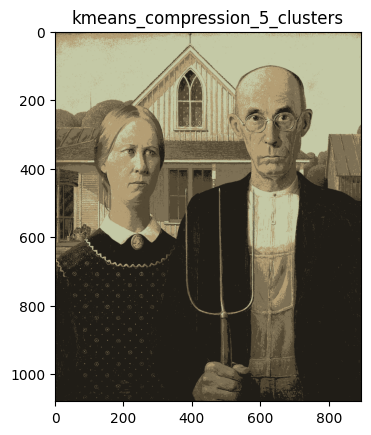

In [30]:
cimg = compress_image(img, 5)
plt.title("kmeans_compression_5_clusters")
plt.imshow(cimg)



Applying k-means clustering for $k\in\{1, 2, 3, 5, 10, 15, 20\}$ and saving the compressed images of each iteration.

In [31]:
for  i in [1,2,3,5,10,15,20] : 
    cimg = compress_image(img, i)
    io.imsave(('a{}.jpg'.format(i)),cimg)
    

/tmp/ipykernel_43662/2012373199.py:5: UserWarning: a1.jpg is a low contrast image
  io.imsave(('a{}.jpg'.format(i)),cimg)


Determining a reasonable number of clusters using the "elbow criterion". For this purpose, plot the total within-cluster sum of squares (attribute "inertia_" of the "KMeans" object) against the number of clusters, e.g. for $k\in[1, 10]$.

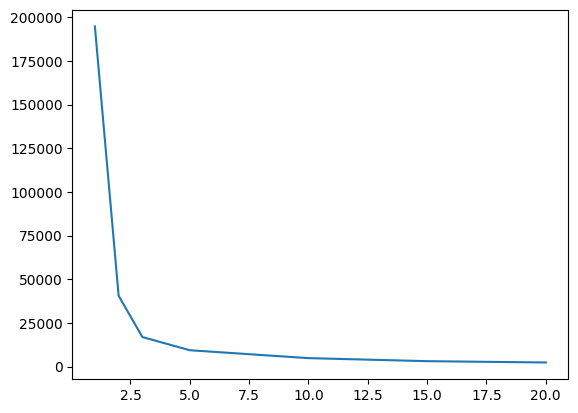

In [34]:
values= []
for  i in [1,2,3,5,10,15,20] : 
    cimg = compress_image(img, i,True)
    values.append(cimg[1].inertia_)
plt.plot([1,2,3,5,10,15,20], values)
    